# Without PCA Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('USA_Housing.csv')
X = dataset.iloc[:,:-2].values

In [3]:
from sklearn.decomposition import PCA

component_var = {}
for i in range(1, 6):
    pca = PCA(n_components=i)
    res = pca.fit(X)
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)

{1: 0.5364445052374007, 2: 0.9999999834238917, 3: 0.9999999923599036, 4: 0.9999999969944166, 5: 0.9999999999999999}


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf.head()

,PC1,PC2
0,-12355.342314,11769.414346
1,-10150.513499,-5176.603162
2,7330.647488,101.398710
3,4997.888602,2427.138669
4,7450.533529,10709.327261


In [5]:
X = principalDf.iloc[:,:].values

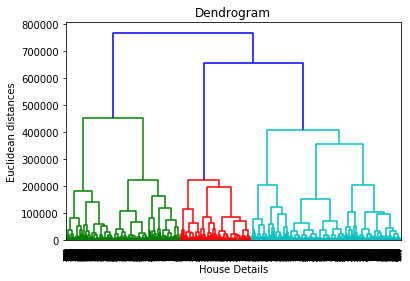

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('House Details')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
%%time
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Wall time: 674 ms


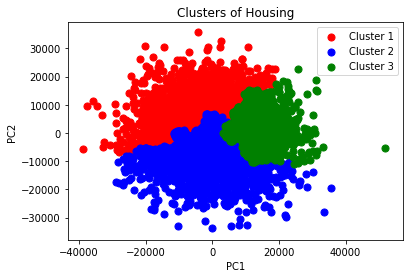

In [37]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Housing')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# K Means

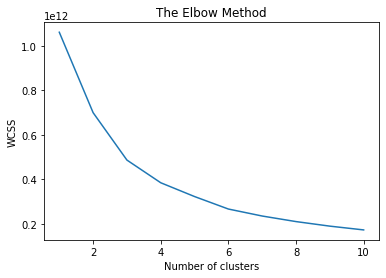

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
   kmeans =KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init= 10,random_state=0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
%%time
kmeans =KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

Wall time: 96.7 ms


Text(0, 0.5, 'PC2')

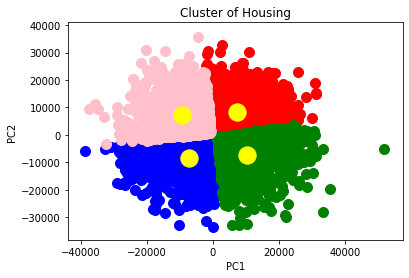

In [35]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='pink',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of Housing')
plt.xlabel('PC1')
plt.ylabel('PC2')